<h1 style="margin:0; line-height:1.5; padding:0;">Intro to Computational Thinking and Programming - Group 4</h1>
<p style="margin:0;line-height:1; padding:0; font-size:20px;">Team Allocation Simulator</p>
<h5 style="margin:0; margin-top:10px; line-height:1; padding:0; padding-top:10px; color:rgba(231, 60, 60, 1); text-decoration: underline; font-weight:bold;">Objective:</h5>
<li>School Affliation: No majority of students from the same school</li>
<li>Gender: No majority of students of the same gender</li>
<li>Current CGPA: To balance academic performance</li>

In [3]:
import csv
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import ipywidgets as widgets
from IPython.display import display, clear_output

path='records.csv'
tut=5

 <h5 style="text-decoration:underline; margin:0; padding:0; line-height:1; font-weight:bold;">Reading and Sorting Data</h5>
        <p>Define a function called <b>tut_grp_json</b> that reads data from the <b>records.csv file</b> and creates a <b>student_data.json file</b> that contains the students details sorted based on their tutorial group in a numerical order and from highest to lowest GPA</p>
       <b style="line-height:.5; margin:0; padding:0;"><u>Pseudocode:</u></b>
        <p style="line-height: 2; margin:0; padding:0;">Function Name: tut_grp_json</p>
        <p style="line-height: 2; margin:0; padding:0;">Parameters: path</p>
        <p style="line-height: 2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Local Variables: </p>
        <ul>
            <li>json_filename(name of json file)</li>
            <li>data(where student data stored)</li> 
            <li>fObj(file)</li>
            <li>reader(data from records.csv)</li>
            <li>row(separate rows of records.csv)</li>
            <li>key(key of data dictionary)</li>
            <li>sorted_by_gpa(data with gpa sorted)</li>
            <li>key_list(where list of keys stored)</li>
            <li>student_data(sorted student data stored)</li>
       </ul>
       <p style="line-height: 2; margin:0; padding:0;">Return Value: student_data.json file name</p>
       <p style="line-height: 1; margin-bottom:-10px; padding-bottom: -10px;">Steps: </p>
        <ol>
           <li>Append .json to <b>json_filename</b></li>
           <li>create empty dicitonary to store data from records.csv</li>
           <li>Open and read records.csv</li>
           <li>Use DictReader, a class from csv library to read data in records.csv</li>
           <li>For each row in records.csv:</li>
           <ol>
               <li>Extract "Tutorial Group" from row to be used as key of dictionary</li>
               <ul>
                   <li>If <b>key</b> not in <b>data</b>: Create new list with row as first item</li>
                   <li>Else append row to existing list of the existing key</li>
               </ul>
           </ol>
           <li>Sort Students by CGPA:</li>
           <ol>
            <ul>
                <li>Loop through each group in the data.</li>
                <li>Sort the list of students for that group by their CGPA, highest first</li>
                <li>Update the group's student list with the sorted result.</li>
            </ul>
           </ol>
           <li>Sort tutorial group numerically:</li>
           <ol>
               <li>Create an empty list(key_list) to store numerical value of tutorial groups</li>
               <ul>
                   <li>Split each key in <b>data</b> by <b>"-"</b> and add the separated tutorial group number to <b>key_list</b></li>
                   <li>Use the sort method to sort values in key_list in numerical order</li>
                   <li>Concantate the letter G to all numerical values (e.g. G-1) in key_list</li>
               </ul>
           </ol>
               <li>Store the sorted data into a new dictionary(student_data) with tutorial groups being the key of each item of the dictionary</li>
               <li>Write student_data into tut_grp.json file</li>
               <li>Return json file back to global variable(json_file)</li>
       </ol>
       


In [4]:
def tut_grp_json(path: str): #path: takes in filepath of csv file; json_filename: specify the file name of the json file without the filetype
    json_filename='student_data.json'
    data={} #overall data
    with open(path,'r',newline='') as fObj:
        reader=csv.DictReader(fObj)
        for row in reader:
            gpa=row["CGPA"]
            row["CGPA"]=float(gpa)
            key=row.pop('Tutorial Group') #remove the tutorial group from the row and store the variable
            if key not in data:
                data[key]=[row] #the value of data[key] is a list; if key not in, create new key
            else:
                data[key].append(row) #if key already exist, append to the existing list corresponding to the key
    
    ###sort students per in tut grp from lowest to highest gpa
    for key in data:
        sorted_by_gpa=sorted(data[key],key=lambda student: student['CGPA'],reverse=True) #sort all the students according to cgpa
        data[key]=sorted_by_gpa

    ###sorting out the keys to make sure they are in order
    key_list=[]
    for key,student_info in data.items():
        key_list.append(int(key.split('-')[1])) #split string at '-'.
        key_list.sort() #sort from 1-120 in numerical order because python does not sort 'G-xx' in numerical order
    def myFunc(i):
        return 'G-'+str(i)
    key_list=list(map(myFunc,key_list))
    student_data = {key: data[key] for key in key_list}

    ###writing the the student_data object into a json file
    with open(json_filename,'w') as fObj:
        #json file cannot be modifiable
        json.dump(student_data,fObj,indent=2) #write to json file so the sorted dictionary cannot be accidentally messed up
    return json_filename

<h5 style="line-height:.5; margin:0; padding:0; font-weight:bold;">Why .json?</h5>
<p>As data stored in a .json file cannot be modified. Thus, ensuring that data is not modified while being used in the program.</p>
<h5 style="text-decoration:underline; line-height:1; margin:20px 0 0 0; padding:20px 0 0 0; font-weight:bold;">Loading Sorted Data into Python Program</h5>
<p>Define a function called <b>load_json_to_dict</b> that returns sorted data from a .json file to store data in a dictionary, where function was called</p>
<b style="line-height:.5; margin:0; padding:0;"><u>Pseudocode:</u></b> 
<p style="line-height: 1.5; margin:0; padding:0;">Function Name: load_json_to_dict</p>
<p style="line-height: 2; margin:0; padding:0;">Parameters: json_file</p>
<p style="line-height: 2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Local Variables: </p>
<ul>
    <li>fObj(file)</li>
    <li>values(store loaded data from json file)</li> 
</ul>
<p style="line-height: 2; margin:0; padding:0;">Return Value: Data from json file</p>
<p style="line-height: 1; margin-bottom:-10px; padding-bottom: -10px;">Steps: </p>
<ol>
    <li>If ".json" is not included in json_file, add .json to json_file</li>
    <li>Open json_file and read the data in it</li>
    <li>Load the data from the json_file into values, then return it back to where the load_json_to_dict was called</li>
</ol>

In [5]:
def load_json_to_dict(json_file: str): #loads json file to a dictionary and returns a dictionary
    if '.json' not in json_file:
        json_file+='.json'
    with open(json_file,'r') as jFileObj:
        values=json.load(jFileObj)
    return values

In [6]:
json_student_data=tut_grp_json(path) #filepath to read to load student_data.json

<h5 style="text-decoration:underline; line-height:1; margin: 0; padding: 0; font-weight:bold;">Summarised data</h5>
<p>Define a function called <b>summarise_data_json</b> that collates the number of students in specific school and their gender for each tutorial group. Then, write it into a .json file.</p>
<b style="line-height:.5; margin:0; padding:0;"><u>Pseudocode:</u></b>
<p style="line-height: 1.5; margin:0; padding:0;">Function Name: summarise_data_json</p>
<p style="line-height: 2; margin:0; padding:0;">Parameters: json_student_data (path to student data JSON file)</p>
<p style="line-height: 2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Local Variables:</p>
<ul>
    <li>student_data (dictionary containing data loaded from JSON)</li>
    <li>json_filename (name of output file)</li>
    <li>data_set (dictionary to store summary statistics)</li>
    <li>schools (set to store unique school names)</li>
    <li>genders (set to store unique gender values)</li>
    <li>summary_stats (dictionary for statistics per tutorial group)</li>
</ul>
<p style="line-height: 2; margin:0; padding:0;">Return Value: summarise_data.json file name</p>
<p style="line-height: 1; margin-bottom:-10px; padding-bottom: -10px;">Steps:</p>
<ol>
    <li>Input Validation:</li>
    <ul>
        <li>Check if input file is 'student_data.json', raise ValueError if not</li>
    </ul>
    <li>Initialize:</li>
    <ul>
        <li>Load student data from JSON file using load_json_to_dict</li>
        <li>Set output filename to 'summarised_data.json'</li>
        <li>Create empty dictionary data_set</li>
    </ul>
    <li>Collect Unique Values:</li>
    <ul>
        <li>Create empty sets for schools and genders</li>
        <li>For each tutorial group in student_data:</li>
        <ul>
            <li>Extract unique schools using map and set</li>
            <li>Extract unique genders using map and set</li>
            <li>Update master sets using union operation</li>
        </ul>
    </ul>
    <li>Process Each Tutorial Group:</li>
    <ul>
        <li>For each tutorial group in student_data:</li>
        <ol>
            <li>Create empty summary_stats dictionary</li>
            <li>Calculate GPA statistics:</li>
            <ul>
                <li>Extract all CGPA values into list</li>
                <li>Store in summary_stats['CGPA']</li>
            </ul>
            <li>Calculate School statistics:</li>
            <ul>
                <li>Get list of all schools in group</li>
                <li>Count occurrences of each unique school</li>
                <li>Store counts in dictionary format</li>
            </ul>
            <li>Calculate Gender statistics:</li>
            <ul>
                <li>Get list of all genders in group</li>
                <li>Count occurrences of each gender</li>
                <li>Store counts in dictionary format</li>
            </ul>
            <li>Store total student count</li>
            <li>Add all statistics to data_set under tutorial group key</li>
        </ol>
    </ul>
    <li>Save Results:</li>
    <ul>
        <li>Write data_set to JSON file with indentation</li>
        <li>Return filename of created JSON file</li>
    </ul>
</ol>

<p>Example Output Structure:</p>
<pre style="background-color:black;padding:10px;border-radius:5px;">
{
    "G-1": {
        "CGPA": [3.5, 3.2, 3.8, ...],
        "Schools": {
            "SCSE": 10,
            "NBS": 5,
            ...
        },
        "Genders": {
            "Male": 8,
            "Female": 7
        },
        "Count": 15
    },
    ...
}
</pre>

In [7]:
def summarise_data_json(json_student_data): #student_data is dictionary objects of student info sorted via tutorial group, dictionary should be loaded via json.load()  
    if json_student_data!='student_data.json':
        raise ValueError

    student_data=load_json_to_dict(json_student_data)
    
    json_filename= 'summarised_data.json'
    data_set={}

    ###sum up all possible faculties and gender
    schools=set()
    genders=set()
    for tut_grp,tut_data in student_data.items(): 
        grp_set=set(map(lambda student: student['School'], tut_data))
        gender_set=set(map(lambda student: student['Gender'], tut_data))
        schools|=grp_set #keep updating the set 'schools' to check how many schools are there in total
        genders|=gender_set
    
    ###sorting the numerical data via tutorial group
    for tut_grp,tut_data in student_data.items(): #tut_data is a list of dictionary object of student info
        summary_stats={}
        ###gpa data
        gpa_list=list(map(lambda student : student["CGPA"], tut_data )) #each iterable stored in the list (dictionary of student info) will be passed thru lambda function
        summary_stats['CGPA']=gpa_list
        
        ###faculty data
        all_schools=list(map(lambda student : student['School'], tut_data))
        def count_sch(sch):
            return (sch,all_schools.count(sch))
        school_tuple=tuple(map(count_sch,schools)) #schools is a set
        school_dict=dict(school_tuple)
        summary_stats['Schools']=school_dict

        ###gender data
        all_genders=list(map(lambda student : student['Gender'], tut_data))
        def count_gender(gender):
            return (gender,all_genders.count(gender))
        gender_tuple=tuple(map(count_gender,genders)) #genders is a set
        gender_dict=dict(gender_tuple) 
        summary_stats['Genders']=gender_dict

        ###count of students
        summary_stats['Count']=len(gpa_list)

        data_set[tut_grp]=summary_stats
        #The dict() constructor builds dictionaries directly from iterable sequences of key-value pairs
        #https://docs.python.org/3/tutorial/datastructures.html#dictionaries

    
    with open(json_filename,'w') as fObj:
        json.dump(data_set,fObj,indent=2)
    
    return json_filename

In [8]:
json_summarised_data=summarise_data_json(json_student_data) #filepath to read to load summarised_data.json

<h5 style="text-decoration:underline; line-height:1; margin: 0; padding: 0; font-weight:bold;">Select Tutorial Groups</h5>
<p>Define a function called <b>tut_grp_select</b> that extracts data from specific tutorial group numbers. Limited to maximum 8 groups for visualization purposes.</p>
<b style="line-height:.5; margin:0; padding:0;"><u>Pseudocode:</u></b>
<p style="line-height: 1.5; margin:0; padding:0;">Function Name: tut_grp_select</p>
<p style="line-height: 2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Parameters:</p>
<ul>
    <li>data_dict: Dictionary containing tutorial group data (can be from summarised_data.json or student_data.json)</li>
    <li>selected_keys: Tuple of tutorial group keys to extract (e.g., ('G-1', 'G-2'))</li>
</ul>
<p style="line-height: 2; margin:0; padding:0;">Return Value: Dictionary containing only the selected tutorial groups' data</p>

<p style="line-height: 1; margin-bottom:-10px; padding-bottom: -10px;">Steps:</p>
<ol>
    <li>Input Validation:</li>
    <ul>
        <li>Check if number of selected_keys is greater than 8</li>
        <li>If true, raise ValueError (too many groups selected)</li>
    </ul>
    <li>Create New Dictionary:</li>
    <ul>
        <li>Use dictionary comprehension to create new dictionary</li>
        <li>For each key in selected_keys:</li>
        <ul>
            <li>Copy the corresponding data from data_dict[key]</li>
            <li>Use same key in new dictionary</li>
        </ul>
    </ul>
    <li>Return filtered dictionary containing only selected groups</li>
</ol>

<p>Example Usage:</p>
<pre style="background-color:black;padding:10px;border-radius:5px;">
Input:
- data_dict = {
    "G-1": {...},
    "G-2": {...},
    "G-3": {...}
  }
- selected_keys = ("G-1", "G-3")

Output:
{
    "G-1": {...},
    "G-3": {...}
}
</pre>

In [9]:
def tut_grp_select(data_dict: dict,selected_keys: tuple): #data_dict can be either summarised data or overall grp data; selected_keys is the selection of tutorial groups in list form, cannot contain more then 8 groups
    if len(selected_keys)>8:
        raise ValueError
    return {key: data_dict[key] for key in selected_keys} #dictionary comprehension

<h5 style="text-decoration:underline; line-height:1; margin: 0; padding: 0; font-weight:bold;">Extract CGPA for Plotting</h5>
<p>Define a function called <b>sort_data_by_CGPA</b> that extracts CGPA data from the summarised file into a format suitable for plotting.</p>
<b style="line-height:.5; margin:0; padding:0;"><u>Pseudocode:</u></b>
<p style="line-height: 1.5; margin:0; padding:0;">Function Name: sort_data_by_CGPA</p>
<p style="line-height: 2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Parameters:</p>
<ul>
    <li>stat_data: Dictionary containing tutorial group statistics (from summarised_data.json)</li>
</ul>
<p style="line-height: 2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Return Values:</p>
<ul>
    <li>data: Tuple of CGPA lists, one list per tutorial group</li>
    <li>axes_labels: Tuple of tutorial group names (e.g., "G-1", "G-2", etc.)</li>
</ul>

<p style="line-height: 1; margin-bottom:-10px; padding-bottom: -10px;">Steps:</p>
<ol>
    <li>Create Tutorial Group Labels:</li>
    <ul>
        <li>Extract all tutorial group names from stat_data keys</li>
        <li>Convert to tuple to ensure order is preserved</li>
        <li>Store in axes_labels</li>
    </ul>
    <li>Extract CGPA Data:</li>
    <ul>
        <li>For each tutorial group in axes_labels:</li>
        <ul>
            <li>Get the CGPA list from stat_data[tut_grp]['CGPA']</li>
            <li>Maintain same order as axes_labels</li>
        </ul>
        <li>Convert list of CGPA lists to tuple</li>
        <li>Store in data</li>
    </ul>
    <li>Return both tuples:</li>
    <ul>
        <li>Return (data, axes_labels) as a tuple</li>
        <li>Ensures CGPA data and labels remain aligned</li>
    </ul>
</ol>

<p>Example Usage:</p>
<pre style="background-color:black;padding:10px;border-radius:5px;">
Input stats_data:
{
    "G-1": {
        "CGPA": [3.5, 3.2, 3.8],
        ...
    },
    "G-2": {
        "CGPA": [3.9, 3.1, 3.4],
        ...
    }
}

Output:
data = ([3.5, 3.2, 3.8], [3.9, 3.1, 3.4])
axes_labels = ("G-1", "G-2")
</pre>

In [10]:
def sort_data_by_CGPA(stat_data: dict): #used to sort out data by just gpa

    ###labels and data for box_plot or any other forms of data
    axes_labels=tuple([tut_grp for tut_grp in stat_data.keys()])
    data=tuple([stat_data[tut_grp]['CGPA'] for tut_grp in axes_labels]) #make sure each gpa list corresponds to the axes_labels index
    
    return data,axes_labels

<h5 style="text-decoration:underline; line-height:1; margin: 0; padding: 0; font-weight:bold;">Boxplot all Tutorial Groups</h5>
<p>Define a function called <b>boxplot_all_tut_grps</b> that reads the summarised data file and draws a grid of boxplots (one per tutorial group).</p>
<b style="line-height:.5; margin:0; padding:0;"><u>Pseudocode:</u></b>
<p style="line-height: 1.5; margin:0; padding:0;">Function Name: boxplot_all_tut_grps</p>
<p style="line-height: 2; margin:0; padding:0;">Parameters: json_summarised_data — path / filename for summarised_data.json</p>
<p style="line-height: 2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Local Variables:</p>
<ul>
  <li><b>stats_data</b> (dict) — result of <code>load_json_to_dict</code>; mapping tutorial group → summary dict (contains 'CGPA', 'Schools', 'Genders', 'Count').</li>
  <li><b>fig</b> (matplotlib.figure.Figure) — the Figure created by <code>plt.subplots</code>.</li>
  <li><b>axes</b> (ndarray of Axes) — 2D array of subplot Axes (shape nrows×ncols; here 4×3).</li>
  <li><b>data</b> (tuple[list[float]]) — sequence of CGPA lists returned by <code>sort_data_by_CGPA</code>.</li>
  <li><b>axes_x</b> (tuple[str]) — matching tutorial-group labels (e.g., 'G-1', 'G-2', ...).</li>
  <li><b>start</b> (int) — start index for the current slice of groups (initially 0).</li>
  <li><b>end</b> (int) — end index (exclusive) for the current slice of groups (initially 10).</li>
  <li><b>row</b> (int) — loop index for subplot row (0..nrows-1).</li>
  <li><b>col</b> (int) — loop index for subplot column (0..ncols-1).</li>
  <li><b>plot_data</b> (tuple[list[float]]) — the sliced subset of <code>data</code> for the current subplot (<code>data[start:end]</code>).</li>
  <li><b>labels_data</b> (tuple[list[str]]) — the sliced subset of <code>axes_x</code> for the current subplot (<code>axes_x[start:end]</code>).</li>
  <li><b>df</b> (dict[str, list[float]]) — mapping label → CGPA list built via <code>dict(zip(labels_data, plot_data))</code> and passed to seaborn.</li>
  <li><b>sns</b>, <b>plt</b> — external plotting modules (seaborn, matplotlib) used for plotting and layout/display.</li>
  <li><b>load_json_to_dict</b>, <b>sort_data_by_CGPA</b> — helper functions invoked by this function (referenced but not defined locally).</li>
</ul>
<p style="line-height: 2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Steps:</p>
<ol>
  <li>Input validation:
    <ul>
      <li>If json_summarised_data is not 'summarised_data.json', raise ValueError.</li>
    </ul>
  </li>
  <li>Load data:
    <ul>
      <li>Call load_json_to_dict(json_summarised_data) to get stats_data (a dict keyed by tutorial group).</li>
    </ul>
  </li>
  <li>Prepare figure:
    <ul>
      <li>Create a matplotlib figure with subplots arranged 4 rows × 3 columns (12 axes total).</li>
    </ul>
  </li>
  <li>Prepare plotting data:
    <ul>
      <li>Call sort_data_by_CGPA(stats_data) to obtain (data, axes_labels):
        <ul>
          <li>data: tuple of CGPA lists, one per tutorial group.</li>
          <li>axes_labels: tuple of corresponding tutorial group names (e.g., 'G-1', 'G-2', ...).</li>
        </ul>
      </li>
    </ul>
  </li>
  <li>Render boxplots in grid order:
    <ul>
      <li>Initialize start = 0 and end = 10 (plot 10 groups per 4×3 grid cell sequence).
      </li>
      <li>For each row index from 0..3:
        <ul>
          <li>For each col index from 0..2:
            <ul>
              <li>Slice plot_data = data[start:end] and labels_data = axes_labels[start:end].</li>
              <li>Create a dictionary mapping labels → plot_data for this subplot.</li>
              <li>Call seaborn.boxplot(data=df, ax=axes[row,col]) to draw boxplots for these groups.</li>
              <li>Call seaborn.stripplot(...) to dislay individual points(CGPA).</li>
              <li>Increment start and end by 10 for the next subplot.</li>
            </ul>
          </li>
        </ul>
      </li>
    </ul>
  </li>
  <li>Finalize and show:
    <ul>
      <li>Call plt.tight_layout() to adjust spacing.</li>
      <li>Call plt.show() to display the figure.</li>
    </ul>
  </li>
</ol>

In [11]:
def boxplot_all_tut_grps(json_summarised_data): #filepath to summarised_data.json
    if json_summarised_data!='summarised_data.json':
        raise ValueError
    stats_data=load_json_to_dict(json_summarised_data)
    fig, axes=plt.subplots(nrows=4,ncols=3) #4x3 subplots
    
    ###plot box
    data,axes_x=sort_data_by_CGPA(stats_data)
    start=0
    end=10
    for row in range(4):
        for col in range(3):
            plot_data=data[start:end]
            labels_data=axes_x[start:end]
            df=dict(zip(labels_data,plot_data))
            sns.boxplot(data=df,ax=axes[row,col]) #plotting 10 values per box
            sns.stripplot(data=df,ax=axes[row,col],color='black',alpha=0.35)
            #axes[row,col]
            start+=10
            end+=10

    ###show box plot
    plt.tight_layout()
    plt.show()

<h5 style="text-decoration:underline; line-height:1; margin: 0; padding: 0; font-weight:bold;">Boxplot some Tutorial Groups</h5>
<p>Define a function called <b>boxplot_some_tut_grps</b> that draws boxplots for a user-selected subset of tutorial groups from the summarised data.</p>
<b style="line-height:.5; margin:0; padding:0;"><u>Pseudocode:</u></b>
<p style="line-height: 1.5; margin:0; padding:0;">Function Name: boxplot_some_tut_grps</p>
<p style="line-height: 2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Parameters:</p>
<ul>
    <li>json_summarised_data — path/filename for summarised_data.json</li>
    <li>selected_keys — tuple of tutorial group keys to plot (e.g. ('G-1','G-6'))</li>
</ul>
<p style="line-height: 2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Local Variables:</p>
<ul>
    <li><b>all_data</b> (dict) — full summarised data loaded by <code>load_json_to_dict</code>.</li>
    <li><b>stat_data</b> (dict) — filtered summarised data returned by <code>tut_grp_select</code> for the selected groups.</li>
    <li><b>data</b> (tuple[list[float]]) — sequence of CGPA lists returned by <code>sort_data_by_CGPA</code> for the selected groups.</li>
    <li><b>axes_x</b> (tuple[str]) — matching tutorial-group labels for the selected groups.</li>
    <li><b>df</b> (dict[str, list[float]]) — mapping label → CGPA list built via <code>dict(zip(axes_x, data))</code> and passed to seaborn.</li>
    <li><b>sns</b>, <b>plt</b> — external plotting modules (seaborn, matplotlib) used to draw plots and manage display.</li>
    <li><b>load_json_to_dict</b>, <b>tut_grp_select</b>, <b>sort_data_by_CGPA</b> — helper functions invoked by this function (referenced but not defined locally).</li>
</ul>
<p style="line-height: 2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Steps:</p>
<ol>
  <li>Input validation:
    <ul>
      <li>If json_summarised_data is not 'summarised_data.json', raise ValueError.</li>
    </ul>
  </li>
  <li>Load data:
    <ul>
      <li>Call load_json_to_dict(json_summarised_data) to get all_data (dictionary keyed by tutorial group).</li>
    </ul>
  </li>
  <li>Select groups:</li>
    <ul>
      <li>Call tut_grp_select(all_data, selected_keys) to produce stat_data containing only chosen groups.</li>
    </ul>
  </li>
  <li>Prepare plotting data:</li>
    <ul>
      <li>Call sort_data_by_CGPA(stat_data) to get (data, axes_labels):
        <ul>
          <li>data: tuple of CGPA lists for the selected groups.</li>
          <li>axes_labels: tuple of selected group names in the same order.</li>
        </ul>
      </li>
      <li>Create a mapping (dictionary) from label → CGPA list, e.g. df = dict(zip(axes_labels, data)).</li>
    </ul>
  </li>
  <li>Plot:
    <ul>
      <li>Call seaborn.boxplot(data=df) to draw boxplots for each selected group on a single axes.</li>
      <li>Call seaborn.stripplot(data=df, color='black', alpha=0.35) to dislay individual datapoints(CGPA).</li>
    </ul>
  </li>
  <li>Finalize:
    <ul>
      <li>Call plt.tight_layout() (optional) to adjust spacing.</li>
      <li>Call plt.show() to display the plot.</li>
    </ul>
  </li>
</ol>

In [12]:
def boxplot_some_tut_grps(json_summarised_data, selected_keys: tuple): #filepath to summarised_data.json
    if json_summarised_data!='summarised_data.json':
        raise ValueError

    all_data=load_json_to_dict(json_summarised_data)
    stat_data=tut_grp_select(all_data,selected_keys)

    ###plot box
    data,axes_x=sort_data_by_CGPA(stat_data)
    df=dict(zip(axes_x,data))
    sns.boxplot(df)
    sns.stripplot(df,color='black',alpha=0.35)

    ###show box plot
    plt.show()

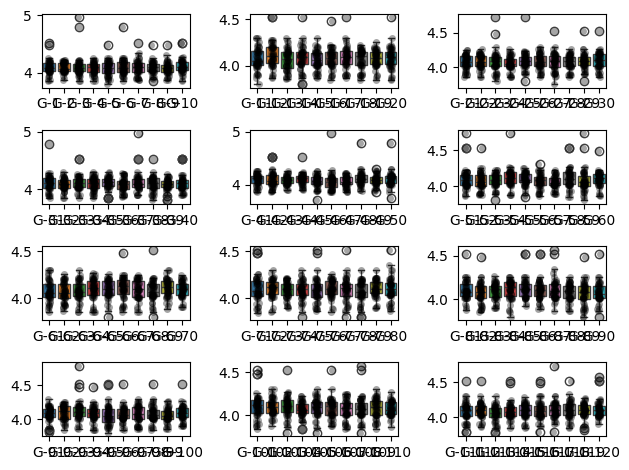

In [13]:
boxplot_all_tut_grps(json_summarised_data)


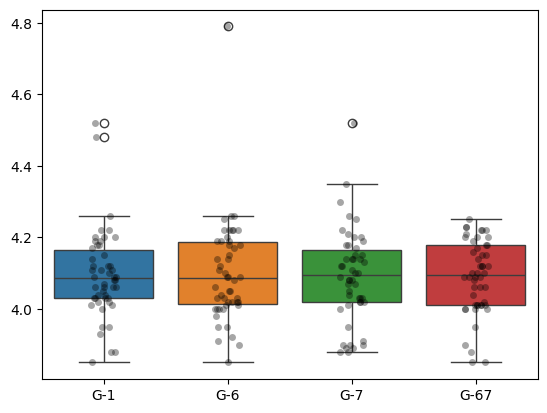

In [14]:
boxplot_some_tut_grps(json_summarised_data,('G-1','G-6','G-7','G-67'))

<h5 style="text-decoration:underline; line-height:1; margin: 0; padding: 0; font-weight:bold;">Sort by Gender</h5>
<p>Define a function called <b>sort_data_by_gender</b> that prepares data for plotting male vs female counts per tutorial group.</p>
<b style="line-height:.5; margin:0; padding:0;"><u>Pseudocode:</u></b>
<p style="line-height:1.5; margin:0; padding:0;">Function Name: sort_data_by_gender</p>
<p style="line-height:1.2; margin:0; padding:0;">Parameters: <code>stats_data</code> — dictionary containing summarised statistics for each tutorial group (from <code>summarised_data.json</code>).</p>
<p style="line-height:1.2; margin:0; padding:0;">Return Values: <code>tut_grp</code>, <code>male</code>, <code>female</code></p>
<p style="line-height:1.2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Local Variables:</p>
<ul>
  <li><b>tut_grp</b> (list[str]) — ordered list of tutorial group labels extracted from <code>stats_data</code>.</li>
  <li><b>male</b> (list[int]) — list of integer counts of male students per corresponding tutorial group.</li>
  <li><b>female</b> (list[int]) — list of integer counts of female students per corresponding tutorial group.</li>
  <li><b>stats_data</b> (dict) — input dictionary; each value is a dict with keys like 'Genders' containing counts.</li>
</ul>
<p style="line-height:1.2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Steps:</p>
<ol>
  <li>Extract tutorial group labels in a stable order: <code>tut_grp = [tut for tut in stats_data]</code>.</li>
  <li>For each tutorial group in <code>stats_data</code>, read the male count from <code>data['Genders']['Male']</code> and collect into the <code>male</code> list.</li>
  <li>Similarly, read the female count from <code>data['Genders']['Female']</code> and collect into the <code>female</code> list.</li>
  <li>Return the three sequences: (<code>tut_grp</code>, <code>male</code>, <code>female</code>), preserving the same ordering.</li>
</ol>
<p style="line-height:1.2; margin:0; padding:0;">Example usage:</p>
<pre style="background-color:black;padding:10px;border-radius:5px;">
stats_data = { 'G-1': {'Genders': {'Male': 8, 'Female': 7}}, 'G-2': {'Genders': {'Male': 5, 'Female': 10}} }
tut_grp, male, female = sort_data_by_gender(stats_data)  # returns (['G-1','G-2'], [8,5], [7,10])
</pre>

In [15]:
def sort_data_by_gender(stats_data: dict): #used to sort out data by just Schools
    ###labels and data for box_plot or any other forms of data
    tut_grp=[tut_grp for tut_grp in stats_data]
    male=[data['Genders']['Male'] for tut_grp,data in stats_data.items()]
    female=[data['Genders']['Female'] for tut_grp,data in stats_data.items()]
    return tut_grp,male,female


<h5 style="text-decoration:underline; line-height:1; margin: 0; padding: 0; font-weight:bold;">Plot Bar for Gender Distribution</h5>
<p>Define a function called <b>plot_bar</b> that creates a grid of bar plots showing gender distribution across tutorial groups.</p>
<b style="line-height:.5; margin:0; padding:0;"><u>Pseudocode:</u></b>
<p style="line-height:1.5; margin:0; padding:0;">Function Name: plot_bar</p>
<p style="line-height:2; margin:0; padding:0;">Parameters: json_summarised_data — path to summarised_data.json file</p>
<p style="line-height:1.2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Local Variables:</p>
<ul>
  <li><b>stats_data</b> (dict) — data loaded from summarised_data.json</li>
  <li><b>tut_grps</b> (list[str]) — tutorial group labels</li>
  <li><b>male</b> (list[int]) — count of male students per group</li>
  <li><b>female</b> (list[int]) — count of female students per group</li>
  <li><b>fig</b>, <b>axes</b> — matplotlib figure and 4×3 grid of axes</li>
  <li><b>start</b>, <b>end</b> (int) — indices for slicing data into groups of 10</li>
  <li><b>row</b>, <b>col</b> (int) — loop indices for subplot grid</li>
  <li><b>indx</b> (ndarray) — array of x-coordinates for bars</li>
  <li><b>bar_width</b> (float) — width of each bar (0.25)</li>
  <li><b>male_bar</b>, <b>female_bar</b> — bar plot objects for legend</li>
</ul>

<p style="line-height:1.2; margin:0; padding:0; margin-bottom:-20px; padding-bottom:-20px;">Steps:</p>
<ol>
  <li>Load and process data:
    <ul>
      <li>Load stats_data from json_summarised_data file</li>
      <li>Extract tutorial groups and gender counts using sort_data_by_gender</li>
    </ul>
  </li>
  <li>Create plot layout:
    <ul>
      <li>Initialize figure with 4×3 grid of subplots</li>
      <li>Set initial start=0 and end=10 for data slicing</li>
    </ul>
  </li>
  <li>Plot data in grid:
    <ul>
      <li>For each row (0 to 3):
        <ul>
          <li>For each column (0 to 2):
            <ul>
              <li>Generate x-coordinates array for current group slice</li>
              <li>Set x-axis ticks and labels for tutorial groups</li>
              <li>Plot male bars offset left by bar_width/2</li>
              <li>Plot female bars offset right by bar_width/2</li>
              <li>Increment start and end by 10 for next subplot</li>
            </ul>
          </li>
        </ul>
      </li>
    </ul>
  </li>
  <li>Finalize plot:
    <ul>
      <li>Add legend showing male and female bars</li>
      <li>Adjust layout spacing</li>
      <li>Display the plot</li>
    </ul>
  </li>
</ol>

<p style="line-height:1.2; margin:0; padding:0;">Example output:</p>
<pre style="background-color:black;padding:10px;border-radius:5px;">
Figure with 4×3 grid of subplots where each subplot shows:
- X-axis: Tutorial group labels (e.g., 'G-1', 'G-2', etc.)
- Y-axis: Number of students
- Two bars per group:
  * Blue bar (left): Male count
  * Orange bar (right): Female count
Legend indicating male/female bars
</pre>

In [16]:
def plot_bar(json_summarised_data):
    stats_data=load_json_to_dict(json_summarised_data)
    tut_grps,male,female=sort_data_by_gender(stats_data)

    fig, axes=plt.subplots(nrows=4,ncols=3)

    ###plot box
    start=0
    end=10
    for row in range(4):
        for col in range(3):
            indx=np.arange(len(tut_grps[start:end]))

            axes[row,col].set_xticks(indx,tut_grps[start:end])
            bar_width=0.25

            male_bar=axes[row,col].bar(indx-bar_width/2,male[start:end],width=bar_width,label='Male',)
            female_bar=axes[row,col].bar(indx+bar_width/2,female[start:end],width=bar_width,label='Female')

            start+=10
            end+=10

    fig.legend([male_bar,female_bar],['Male','Female'])
    ###show box plot
    plt.tight_layout()
    plt.show()

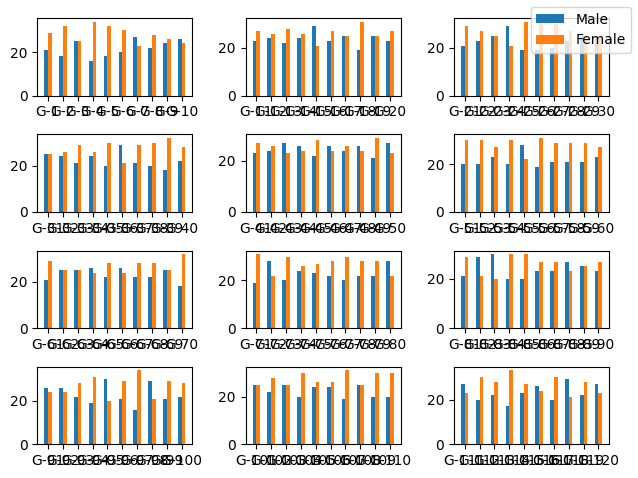

In [17]:
plot_bar(json_summarised_data)

In [18]:
def snake_draft(students_sorted,num_teams=10):#this function creates a WIP grouping for an individual tg based solely on gpa in a snake draft format
    def _draft(students_sorted, num_teams=10): 
        teams = [[] for tm in range(num_teams)] # generates an empty list for each team
    
        current_team_index = 0
        direction = 1

        for student in students_sorted:
            teams[current_team_index].append(student) #adds the student at current index to the current group(ungrouped student with the lowest index-highest gpa)
            current_team_index += direction

            if current_team_index == num_teams: #block to reverse direction, creating the snake draft
                direction = -1
                current_team_index = num_teams - 1
            elif current_team_index == -1:
                direction = 1
                current_team_index = 0
            
        return teams
    
    if isinstance(students_sorted,dict):
        return {tg: _draft(students ,num_teams) for tg,students in students_sorted.items()}
    else:   
        return _draft(students_sorted, num_teams)

In [19]:
def diversity_score(team): #grades how diverse each group is(lower better)
    score = 0
    gender_counts = {}
    school_counts = {}

    for student in team:
        gender_counts[student['Gender']] = gender_counts.get(student['Gender'], 0) + 1
        school_counts[student['School']] = school_counts.get(student['School'], 0) + 1

    for count in gender_counts.values():
        if count >= 3:
            score += (count - 2) * 10 #every 3rd person onwards of the same gender will add 10 to the diversity score

    for count in school_counts.values():
        if count >= 2:
            score += (count - 2) * 10 #every 2nd person onwards of the same school will add 10 to the diversity score

    return score


In [20]:
def total_cgpa_variance(teams):
    if not teams or not all(teams):
        return 0
    
    team_averages = [sum(s['CGPA'] for s in team) / len(team) for team in teams] #calculate the average cgpa of each group
    overall_average = sum(team_averages) / len(team_averages) #calculate the average cgpa of the tg
    
    variance = sum((avg - overall_average) ** 2 for avg in team_averages) / len(team_averages) #calculates the variance of the average tg (standard s^2 variance)
    return variance

In [21]:
def optimize_teams(teams_in_tg, diversity_weight=0.70, cgpa_weight=0.30):
    DIVERSITY_WEIGHT = diversity_weight
    CGPA_WEIGHT = cgpa_weight #set weights

    for k in range(1000): #number of tests to run
        current_diversity_score = sum(diversity_score(t) for t in teams_in_tg)
        current_cgpa_variance = total_cgpa_variance(teams_in_tg) #calculates initial score and variance of current teams

        if current_diversity_score == 0 and current_cgpa_variance < 0.001: #if teams are new perfect, dont change
            break 

        best_improvement_score = 0
        best_swap_details = None #instansiation of vars

        for i in range(len(teams_in_tg)):
            for j in range(i + 1, len(teams_in_tg)): #every combination of teams

                for s1_idx in range(len(teams_in_tg[i])):
                    for s2_idx in range(len(teams_in_tg[j])): 
                        team1 = teams_in_tg[i]
                        team2 = teams_in_tg[j]#every combination of students within the chosen teams

                        team1[s1_idx], team2[s2_idx] = team2[s2_idx], team1[s1_idx]#simulate the swap

                        new_diversity_score = sum(diversity_score(t) for t in teams_in_tg)
                        new_cgpa_variance = total_cgpa_variance(teams_in_tg) #new scores for the swap
                        
                        diversity_improvement = current_diversity_score - new_diversity_score #change in diversity score
                        cgpa_improvement = current_cgpa_variance - new_cgpa_variance #change in cgpa variance

                        total_improvement = (diversity_improvement * DIVERSITY_WEIGHT) + (cgpa_improvement * CGPA_WEIGHT)

                        if total_improvement > best_improvement_score:
                            best_improvement_score = total_improvement
                            best_swap_details = (i, j, s1_idx, s2_idx)#if this is the best swap, store it 

                        team1[s1_idx], team2[s2_idx] = team2[s2_idx], team1[s1_idx] #swap back for now to check all other possibilities
        
        if best_swap_details:
            i, j, s1, s2 = best_swap_details
            teams_in_tg[i][s1], teams_in_tg[j][s2] = teams_in_tg[j][s2], teams_in_tg[i][s1]#sets the best swap after checking all
        else:
            break#if there are no good swaps, break the loop to save computational power
            
    return teams_in_tg

In [22]:
def create_teams_by_size(students_sorted, team_size):
    if isinstance(students_sorted, dict):
        return {tg: create_teams_by_size(students, team_size) for tg, students in students_sorted.items()}
    n = len(students_sorted)
    if n == 0:
        return []
    num_teams = math.ceil(n / team_size)#returns number of teams with team size.
    return snake_draft(students_sorted, num_teams=num_teams) #reuse snake


In [23]:
def data_compilation(all_optimized_tgs): #prepares data for csv writing and assigns team numbers
    final_student_list = []
    sorted_tg_names = sorted(all_optimized_tgs.keys())

    for tg_name in sorted_tg_names:
        list_of_teams = all_optimized_tgs[tg_name]#grabs the list of teams in a tg
        for team_index, team in enumerate(list_of_teams):
            team_number = team_index + 1 # adds a group number 
            for student in team:
                student["Tutorial Group"] = tg_name
                student["Team Assigned"] = team_number #assigns the group number to the student
                final_student_list.append(student) #adds the student, with all their data into the list as a list
    return final_student_list

In [24]:
def write_output_csv(final_student_list, output_path="final_teams.csv"):
    if not final_student_list:
        print("No data available to write.") #incase of faulty inputs
        return
    
    headers = ["Tutorial Group", "Team Assigned", "Student ID", "Name", "School", "Gender", "CGPA"] #initialise the headers
    
    output_data = [{header: student.get(header) for header in headers} for student in final_student_list]

    with open(output_path, mode='w', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=headers)
        writer.writeheader()
        writer.writerows(output_data) #write file
    print(f"Successfully created GPA-optimized allocation file: {output_path}")


In [ ]:
def _run_all(team_size, diversity_wt, cgpa_wt):
    # normalize weights so they sum to 1 (if both zero, fallback to defaults)
    total = diversity_wt + cgpa_wt
    if total == 0:
        diversity_wt, cgpa_wt = 0.7, 0.3
    else:
        diversity_wt, cgpa_wt = diversity_wt / total, cgpa_wt / total

    # Create (or refresh) the sorted JSON from the CSV and load it
    json_file = tut_grp_json(path)#records.csv
    tutorial_groups = load_json_to_dict(json_file)

    if not tutorial_groups:
        print("No data found after loading JSON.")
        return

    all_optimized_teams = {}

    for tg_name, students in tutorial_groups.items():
        print(f"Processing Tutorial Group: {tg_name} (team size={team_size})...")
        initial_teams = create_teams_by_size(students, team_size)
        optimized_teams = optimize_teams(initial_teams, diversity_weight=diversity_wt, cgpa_weight=cgpa_wt)
        all_optimized_teams[tg_name] = optimized_teams

    final_list = data_compilation(all_optimized_teams)
    write_output_csv(final_list, output_path="final_teams.csv")
    print("Done. Output written to final_teams.csv.")

team_size_slider = widgets.IntSlider(value=5, min=4, max=10, step=1, description='Team Size')
diversity_slider = widgets.FloatSlider(value=0.7, min=0.0, max=1.0, step=0.01, description='Diversity Wt')
cgpa_slider = widgets.FloatSlider(value=0.3, min=0.0, max=1.0, step=0.01, description='CGPA Wt')
run_button = widgets.Button(description='Run')
output_area = widgets.Output()

def on_run_clicked(b):
    with output_area:
        clear_output(wait=True)
        _run_all(team_size_slider.value, diversity_slider.value, cgpa_slider.value)

run_button.on_click(on_run_clicked)
display(widgets.HBox([team_size_slider, diversity_slider, cgpa_slider, run_button]))
display(output_area)


Output()

In [26]:
json_file = tut_grp_json(path)
if not json_file:
    print("Could not produce student_data.json from records.csv.")
else:
    tutorial_groups = load_json_to_dict(json_file)
    if not tutorial_groups:
        print("No data found after loading JSON.")
    else:
        # Display GUI controls so user can interact if desired
        try:
            display(widgets.HBox([team_size_slider, diversity_slider, cgpa_slider, run_button]))
            display(output_area)
        except NameError:
            team_size_slider = widgets.IntSlider(value=5, min=4, max=10, step=1, description='Team Size')
            diversity_slider = widgets.FloatSlider(value=0.7, min=0.0, max=1.0, step=0.01, description='Diversity Wt')
            cgpa_slider = widgets.FloatSlider(value=0.3, min=0.0, max=1.0, step=0.01, description='CGPA Wt')
            run_button = widgets.Button(description='Run')
            output_area = widgets.Output()

            def _local_on_click(b):
                with output_area:
                    clear_output(wait=True)
                    _run_all(team_size_slider.value, diversity_slider.value, cgpa_slider.value)
            run_button.on_click(_local_on_click)
            display(widgets.HBox([team_size_slider, diversity_slider, cgpa_slider, run_button]))
            display(output_area)

        print(f"Running. Values: team_size={team_size_slider.value}, diversity_wt={diversity_slider.value}, cgpa_wt={cgpa_slider.value}")
        _run_all(team_size_slider.value, diversity_slider.value, cgpa_slider.value)


Output()

Running. Values: team_size=10, diversity_wt=0.7, cgpa_wt=0.3
Processing Tutorial Group: G-1 (team size=10)...
Processing Tutorial Group: G-2 (team size=10)...
Processing Tutorial Group: G-3 (team size=10)...
Processing Tutorial Group: G-4 (team size=10)...
Processing Tutorial Group: G-5 (team size=10)...
Processing Tutorial Group: G-6 (team size=10)...
Processing Tutorial Group: G-7 (team size=10)...
Processing Tutorial Group: G-8 (team size=10)...
Processing Tutorial Group: G-9 (team size=10)...
Processing Tutorial Group: G-10 (team size=10)...
Processing Tutorial Group: G-11 (team size=10)...
Processing Tutorial Group: G-12 (team size=10)...
Processing Tutorial Group: G-13 (team size=10)...
Processing Tutorial Group: G-14 (team size=10)...
Processing Tutorial Group: G-15 (team size=10)...
Processing Tutorial Group: G-16 (team size=10)...
Processing Tutorial Group: G-17 (team size=10)...
Processing Tutorial Group: G-18 (team size=10)...
Processing Tutorial Group: G-19 (team size=10)..